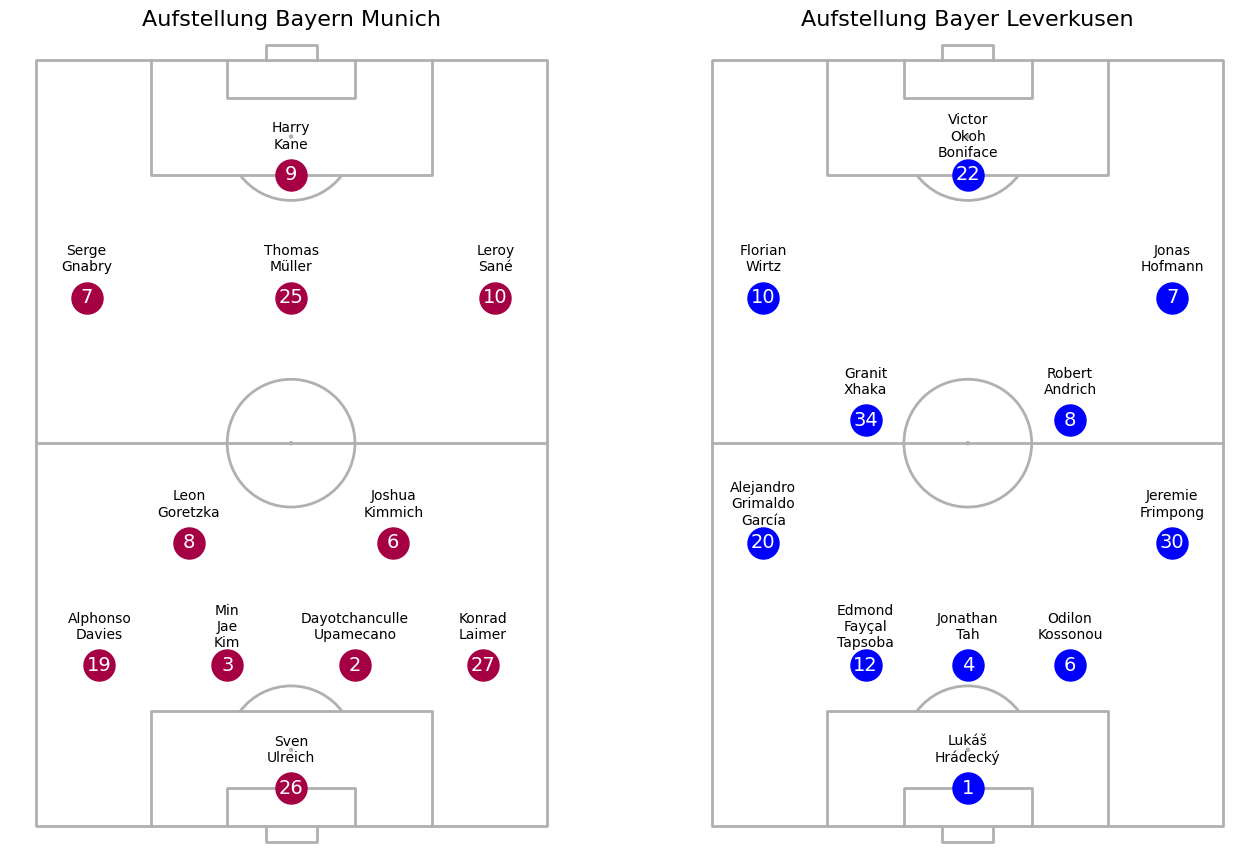

In [9]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt
import pandas as pd
from statsbombpy import sb

# Match-ID festlegen
match_id = 3895074
events = sb.events(match_id=match_id)

# Hole beide "Starting XI" Events
starting_xi_events = events[events['type'] == 'Starting XI']
teams = starting_xi_events['team'].tolist()
team_ids = starting_xi_events['team_id'].tolist()

# Farben: Team 1 = Rot, Team 2 = Blau
team_colors = ['#a50044', 'blue']

# Erzeuge zwei nebeneinander liegende Pitches
fig, axs = plt.subplots(1, 2, figsize=(14, 8.72))  # 1 Zeile, 2 Spalten

# Durchlaufe beide Teams
for idx, (team_name, team_id) in enumerate(zip(teams, team_ids)):
    # Hole Taktik-Infos & Lineup
    tactics = starting_xi_events[starting_xi_events['team_id'] == team_id]['tactics'].iloc[0]
    formation_str = '-'.join(list(str(tactics['formation'])))
    lineup = tactics['lineup']

    # Spieler-Daten extrahieren
    df = pd.DataFrame([{
        'player_id': player['player']['id'],
        'player_name': player['player']['name'],
        'position_id': player['position']['id'],
        'position_name': player['position']['name'],
        'jersey_number': player['jersey_number']
    } for player in lineup])

    # Pitch auf der richtigen Achse zeichnen
    pitch = VerticalPitch(goal_type='box')
    pitch.draw(ax=axs[idx])
    axs[idx].set_title(f"Aufstellung {team_name}", fontsize=16)

    # Punkte (Spielerpositionen)
    pitch.formation(
        formation_str,
        positions=df.position_id,
        kind='scatter',
        c=team_colors[idx],
        s=500,
        xoffset=-6,
        ax=axs[idx]
    )

    # Spielernummern
    pitch.formation(
        formation_str,
        positions=df.position_id,
        kind='text',
        text=df['jersey_number'].astype(str),
        va='center',
        ha='center',
        fontsize=14,
        color='white',
        xoffset=-6,
        ax=axs[idx]
    )

    # Spielernamen (mit Zeilenumbruch)
    pitch.formation(
        formation_str,
        positions=df.position_id,
        kind='text',
        text=df.player_name.str.replace(' ', '\n'),
        va='center',
        ha='center',
        fontsize=10,
        ax=axs[idx]
    )

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()